In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import torch

In [3]:
def summary_test(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_val(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["val_loss"])
    tmp2 = np.array(history[0]["val_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["val_loss"])
        tmp2 += np.array(history[j]["val_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_train(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["train_loss"])
    tmp2 = np.array(history[0]["train_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["train_loss"])
        tmp2 += np.array(history[j]["train_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

In [4]:
def search_best_lr(path, n_nodes, lr_list):
    
    best_acc = -1
    best_lr = -1
    
    for lr in lr_list:
        _, acc = summary_val(f"{path}/lr_{lr}_beta_0.9", n_nodes)
            
        #print(method, lr, acc[-1])
        if best_acc < acc[-1]:
            best_acc = acc[-1]
            best_lr = lr
    return best_lr

def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

In [5]:
!ls ../results/cifar_vgg/10_node/0/alpha_10.0/* #/alpha_10.0/ring/

../results/cifar_vgg/10_node/0/alpha_10.0/one_peer_deco3:
lr_0.05_beta_0.9  lr_0.1_beta_0.9

../results/cifar_vgg/10_node/0/alpha_10.0/one_peer_exp:
lr_0.05_beta_0.9  lr_0.1_beta_0.9

../results/cifar_vgg/10_node/0/alpha_10.0/ring:
lr_0.05_beta_0.9  lr_0.1_beta_0.9


# CIFAR-10

ring 0.05 87.228 0.0
one_peer_deco3 0.05 87.496 0.0
one_peer_exp 0.05 88.667 0.0


Text(0.5, 1.0, 'alpha=10.0')

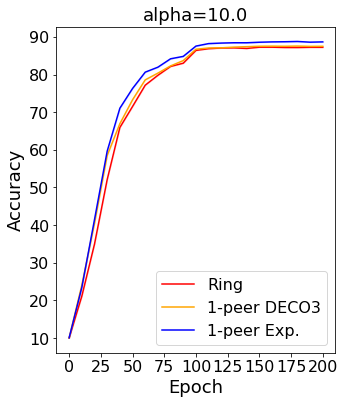

In [6]:
alpha = 10.0
n_nodes = 10

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.05 83.356 0.0
one_peer_deco3 0.05 86.087 0.0
one_peer_exp 0.05 87.25500000000001 0.0


Text(0.5, 1.0, 'alpha=1.0')

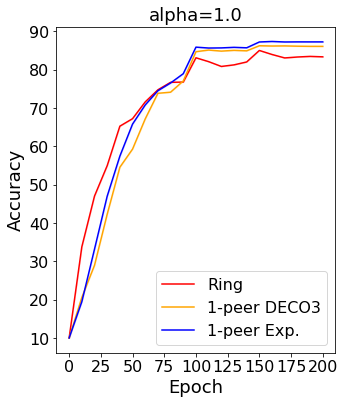

In [7]:
alpha = 1.0
n_nodes = 10

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.05 62.70100000000001 0.0
one_peer_deco3 0.05 74.802 0.0
one_peer_exp 0.1 72.266 0.0


Text(0.5, 1.0, 'alpha=0.1')

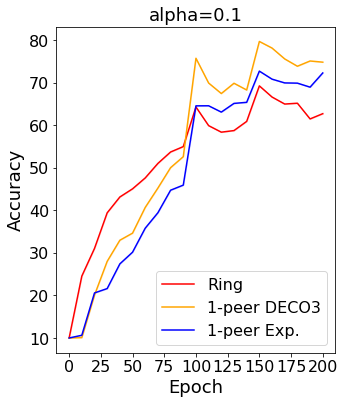

In [8]:
alpha = 0.1
n_nodes = 10

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.1 65.4665 0.0
one_peer_deco3 0.1 78.26999999999998 0.0
one_peer_exp 0.1 81.43800000000002 0.0


Text(0.5, 1.0, 'alpha=10.0')

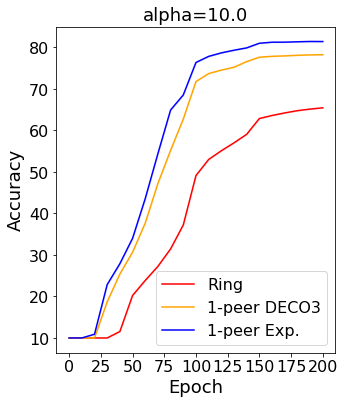

In [9]:
alpha = 10.0
n_nodes = 20

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.01 84.1765 0.0
one_peer_deco3 0.01 84.643 0.0
one_peer_exp 0.01 85.1845 0.0


Text(0.5, 1.0, 'alpha=10.0')

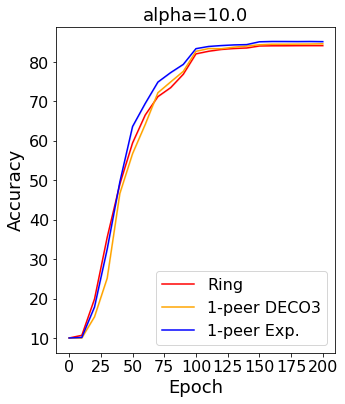

In [10]:
alpha = 10.0
n_nodes = 20

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.01 81.3245 0.0
one_peer_deco3 0.01 78.369 0.0
one_peer_exp 0.01 81.338 0.0


Text(0.5, 1.0, 'alpha=1.0')

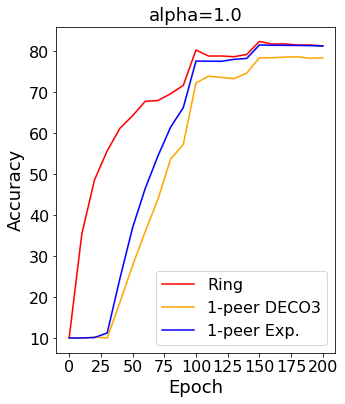

In [11]:
alpha = 1.0
n_nodes = 20

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.01 63.07350000000002 0.0
one_peer_deco3 0.01 66.00400000000002 0.0
one_peer_exp 0.01 64.388 0.0


Text(0.5, 1.0, 'alpha=0.1')

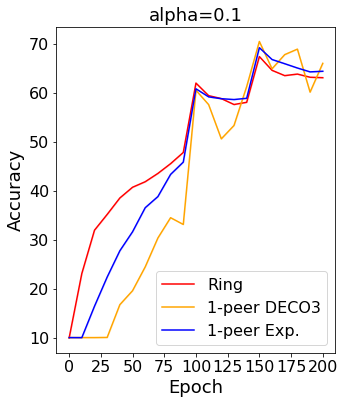

In [12]:
alpha = 0.1
n_nodes = 20

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/{n_nodes}_node/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


# Local Step 5

ring 0.005 85.10849999999998 0.0
one_peer_deco4 0.005 85.46099999999998 0.0
one_peer_exp 0.005 85.5485 0.0


Text(0.5, 1.0, 'alpha=10.0')

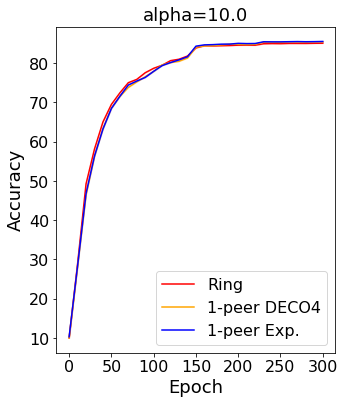

In [7]:
alpha = 10.0
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.01 82.5905 0.0
one_peer_deco4 0.005 80.08800000000001 0.0
one_peer_exp 0.005 79.56900000000002 0.0


Text(0.5, 1.0, 'alpha=1.0')

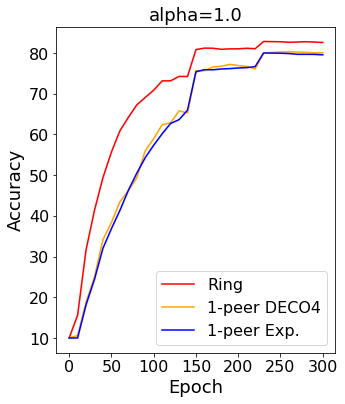

In [11]:
alpha = 1.0
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005,0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.005 66.024 0.0
one_peer_deco4 0.005 58.146999999999984 0.0
one_peer_exp 0.005 61.1095 0.0


Text(0.5, 1.0, 'alpha=0.1')

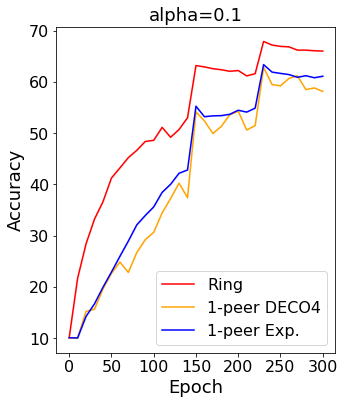

In [9]:
alpha = 0.1
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005,0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


# QG-DSGDm

ring 0.005 82.73550000000002 0.0
one_peer_deco4 0.005 82.649 0.0
one_peer_exp 0.005 82.51799999999999 0.0


Text(0.5, 1.0, 'alpha=10.0')

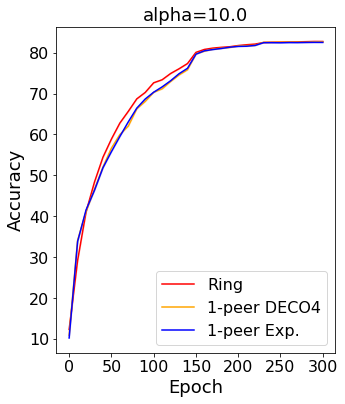

In [7]:
alpha = 10.0
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/qg_dsgdm/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/qg_dsgdm/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.005 78.09700000000001 0.0
one_peer_deco4 0.005 77.496 0.0
one_peer_exp 0.005 77.64 0.0


Text(0.5, 1.0, 'alpha=1.0')

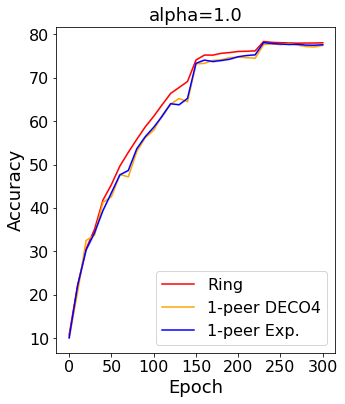

In [8]:
alpha = 1.0
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/qg_dsgdm/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/qg_dsgdm/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.005 56.52649999999999 0.0
one_peer_deco4 0.005 55.242000000000004 0.0
one_peer_exp 0.005 53.8565 0.0


Text(0.5, 1.0, 'alpha=0.1')

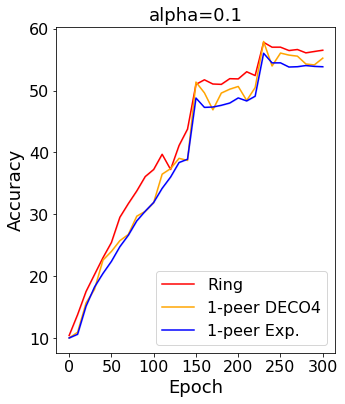

In [9]:
alpha = 0.1
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/qg_dsgdm/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/qg_dsgdm/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


# バッチサイズ32

ring 0.005 86.72650000000003 0.0
one_peer_deco4 0.005 86.69100000000002 0.0
one_peer_exp 0.005 86.72049999999999 0.0


Text(0.5, 1.0, 'alpha=10.0')

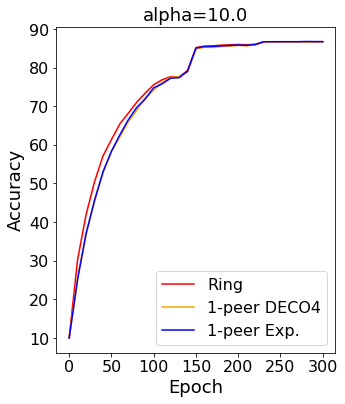

In [7]:
alpha = 10.0
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005,0.01])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.005 80.95899999999997 0.0
one_peer_deco4 0.005 82.394 0.0
one_peer_exp 0.005 79.29549999999999 0.0


Text(0.5, 1.0, 'alpha=1.0')

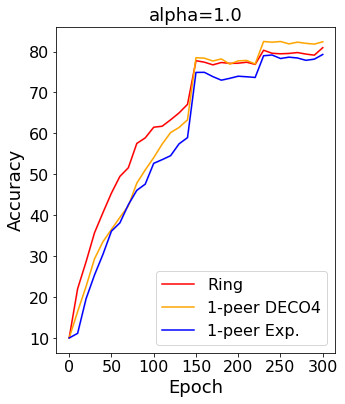

In [8]:
alpha = 1.0
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005,0.01])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.005 62.066 0.0
one_peer_deco4 0.005 53.464 0.0
one_peer_exp 0.005 56.14350000000001 0.0


Text(0.5, 1.0, 'alpha=0.1')

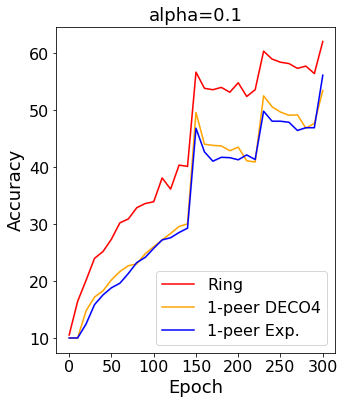

In [12]:
alpha = 0.1
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]


results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


# Cosine

ring 0.01 69.025 0.0
one_peer_adic 0.005 78.673 0.0
one_peer_exp 0.005 76.94149999999999 0.0


Text(0.5, 1.0, 'alpha=0.1')

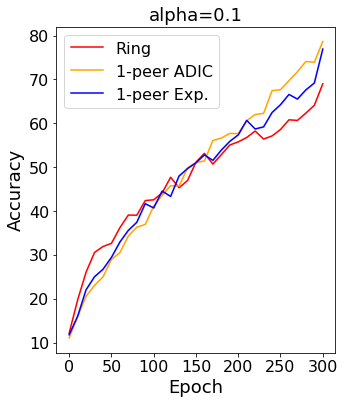

In [12]:
alpha = 0.1
n_nodes = 20
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005,0.01])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

# N=30

ring 0.005 69.33166666666668 0.0
one_peer_adic 0.005 73.04399999999998 0.0
one_peer_exp 0.005 75.64366666666669 0.0


Text(0.5, 1.0, 'alpha=0.1')

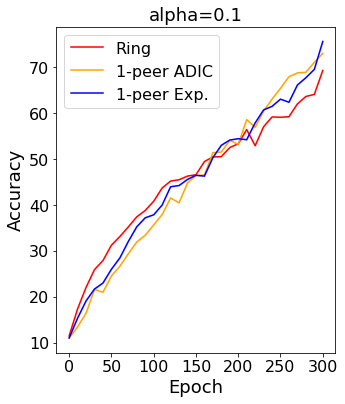

In [12]:
alpha = 0.1
n_nodes = 30
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

ring 0.005 83.75366666666665 0.0
one_peer_adic 0.005 84.60733333333332 0.0
one_peer_exp 0.005 84.86666666666666 0.0


Text(0.5, 1.0, 'alpha=1.0')

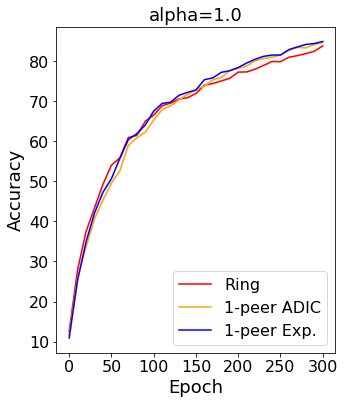

In [6]:
alpha = 1.0
n_nodes = 30
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

# N=25

ring 0.01 85.70119999999999 0.0
one_peer_adic_wo_shuffle 0.01 87.72960000000002 0.0
one_peer_adic 0.01 87.27839999999999 0.0
one_peer_exp 0.01 87.32200000000002 0.0


Text(0.5, 1.0, 'alpha=1.0')

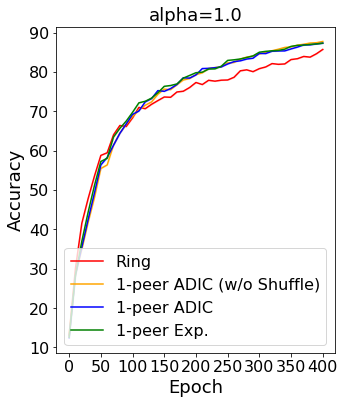

In [6]:
alpha = 1.0
n_nodes = 25
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic_wo_shuffle", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC (w/o Shuffle)", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine_400/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine_400/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

ring 0.01 70.868 0.0
one_peer_adic_wo_shuffle 0.005 79.3924 0.0
one_peer_adic 0.01 79.96600000000001 0.0
one_peer_exp 0.005 76.24159999999999 0.0


Text(0.5, 1.0, 'alpha=0.1')

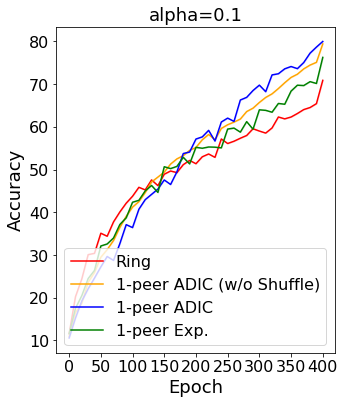

In [7]:
alpha = 0.1
n_nodes = 25
local_step = 5


colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic_wo_shuffle", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC (w/o Shuffle)", "1-peer ADIC", "1-peer Exp."]




results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine_400/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005,0.01])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine_400/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

ring 0.005 84.612 0.0
one_peer_adic 0.005 85.91440000000001 0.0
one_peer_exp 0.005 85.65120000000002 0.0


Text(0.5, 1.0, 'alpha=1.0')

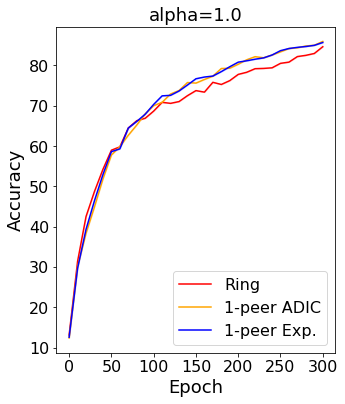

In [7]:
alpha = 1.0
n_nodes = 25
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

ring 0.005 67.88239999999999 0.0
one_peer_adic 0.005 76.12040000000002 0.0
one_peer_exp 0.005 73.94839999999999 0.0


Text(0.5, 1.0, 'alpha=0.1')

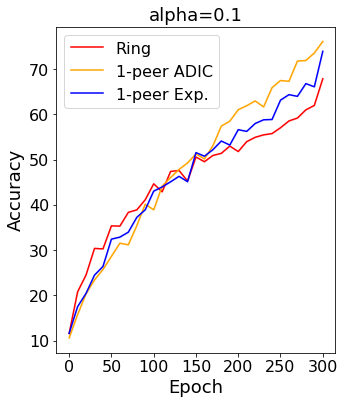

In [8]:
alpha = 0.1
n_nodes = 25
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

# QG-DSGDm

ring 0.01 83.8624 0.0
one_peer_adic 0.01 84.2148 0.0
one_peer_exp 0.01 84.35600000000001 0.0


Text(0.5, 1.0, 'alpha=1.0')

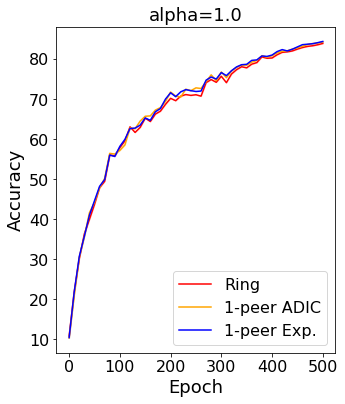

In [7]:
alpha = 1.0
n_nodes = 25
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine_500/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine_500/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


ring 0.05 72.5852 0.0
one_peer_adic 0.05 79.7396 0.0
one_peer_exp 0.05 78.27759999999998 0.0


Text(0.5, 1.0, 'alpha=0.1')

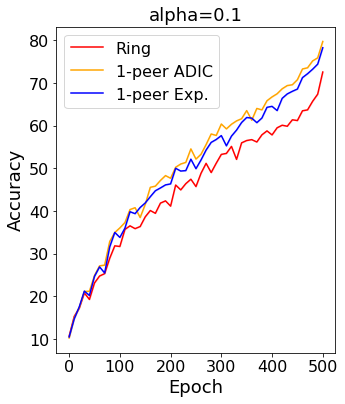

In [12]:
alpha = 0.1
n_nodes = 25
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine_500/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005, 0.01, 0.05])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine_500/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


# Local STep = 1

ring 0.05 74.82759999999999 0.0
one_peer_adic 0.01 86.2732 0.0
one_peer_exp 0.1 83.39760000000001 0.0


Text(0.5, 1.0, 'alpha=0.1')

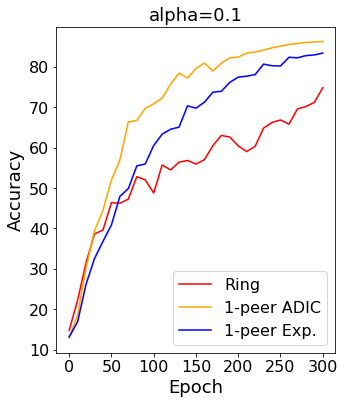

In [10]:
alpha = 0.1
n_nodes = 25
local_step = 1

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]



results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine_300/gossip/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine_300/gossip/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        #loss, acc = summary_train(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)

#plt.ylim(70,80)
#plt.xlim(250, 310)

In [7]:
!ls ../results/cifar_vgg_batch_32_cosine/node_25/1_local_step/0/alpha_0.1/ring/lr_0.05_beta_0.9

ls: '../results/cifar_vgg_batch_32_cosine/node_25/1_local_step/0/alpha_0.1/ring/lr_0.05_beta_0.9' にアクセスできません: そのようなファイルやディレクトリはありません


* 学習率が0.01のように大きめのときはもう少し速く収束するかもしれないので様子見